# 0. Install and Import Dependencies

In [ ]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import numpy

C:\Users\Christopher Ogbeide\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:24: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# 1. Read in Data and Process Dates

In [2]:
df = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Christopher Ogbeide\AppData\Local\Temp\ipykernel_8684\840405784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date'] = pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
65745,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,0.6,No
65746,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,1.4,Yes
65747,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,0.6,No
65748,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,0.0,No
65749,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,0.0,No


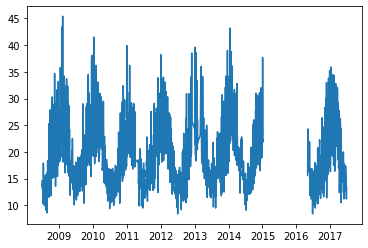

In [6]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Christopher Ogbeide\AppData\Local\Temp\ipykernel_8684\2723601389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)



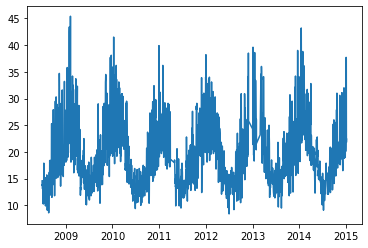

In [7]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [8]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Christopher Ogbeide\AppData\Local\Temp\ipykernel_8684\2711387133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
65745,2008-07-01,14.6
65746,2008-07-02,13.7
65747,2008-07-03,13.9
65748,2008-07-04,13.1
65749,2008-07-05,14.6


# 2. Train Model

In [9]:
m = NeuralProphet()

In [10]:
model = m.fit(data, freq='D', epochs=500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 92.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# 3. Forecast Away

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

In [ ]:
plot1 = m.plot(forecast)

In [ ]:
plt2 = m.plot_components(forecast)

# 4. Save Model

In [ ]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [ ]:
del m

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

In [ ]:
plot1 = m.plot(forecast)